<a href="https://colab.research.google.com/github/donggale72/10000.html/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)


In [ ]:
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning.git

Cloning into 'SkillTreePython-DeepLearning'...
remote: Enumerating objects: 379, done.
remote: Counting objects: 100% (201/201), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 379 (delta 126), reused 120 (delta 78), pack-reused 178
Receiving objects: 100% (379/379), 22.46 MiB | 24.13 MiB/s, done.
Resolving deltas: 100% (161/161), done.


In [ ]:
data_path='/content/SkillTreePython-DeepLearning/dataset/iris.csv'
df=pd.read_csv(data_path, header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Text(0.5, 1.0, 'all dataset')

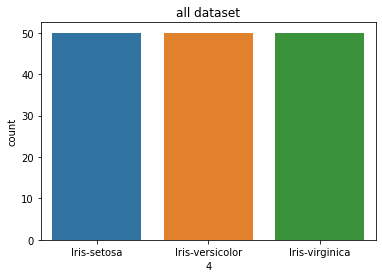

In [ ]:
sns.countplot(x=df[4]); plt.title('all dataset')

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

def iris_preprocess(df, seed=1):
  x=df.values[:, :-1]
  y=df.values[:, -1]
  ss=StandardScaler()
  x=ss.fit_transform(x)
  oh=OneHotEncoder(sparse=False)
  y=oh.fit_transform(np.expand_dims(y,1))
  x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=seed, stratify=y)
  return x_train, x_test, y_train, y_test


x_train, x_test, y_train, y_test=iris_preprocess(df)
print(f'데이터형태: {x_train.shape}, {x_test.shape}, {y_train.shape}, {y_test.shape}')
print(f'첫번째 샘플 x: {x_train[0]} y:{y_train[0]}')

데이터형태: (105, 4), (45, 4), (105, 3), (45, 3)
첫번째 샘플 x: [ 0.55333328 -0.58776353  0.76275864  0.39617188] y:[0. 0. 1.]


Text(0.5, 1.0, 'test datas')

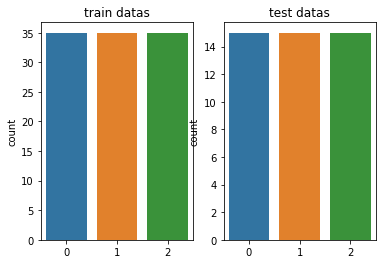

In [ ]:
plt.subplot(121); sns.countplot(x=np.argmax(y_train, axis=1)); plt.title('train datas')
plt.subplot(122); sns.countplot(x=np.argmax(y_test, axis=1)); plt.title('test datas')

In [ ]:
from tensorflow.keras import models, layers, utils

def build_model():
  x=layers.Input(shape=(4,))
  y=layers.Dense(12, activation='relu')(x)
  y=layers.Dense(8, activation='relu')(y)
  y=layers.Dense(3, activation='softmax', name='OutputLayer')(y)
  model=models.Model(x, y)
  return model

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_8 (Dense)             (None, 12)                60        
                                                                 
 dense_9 (Dense)             (None, 8)                 104       
                                                                 
 OutputLayer (Dense)         (None, 3)                 27        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


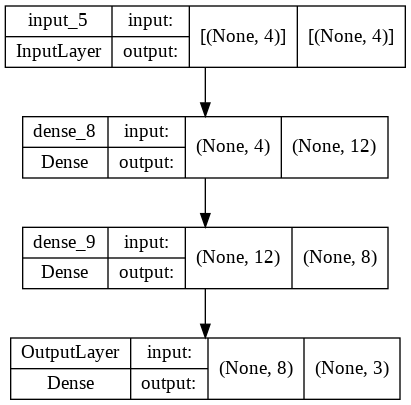

In [ ]:
model=build_model()
model.summary()
utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=200, batch_size=8)

Epoch 1/200
14/14 [==============================] - 1s 5ms/step - loss: 1.3182 - accuracy: 0.0190
Epoch 2/200
14/14 [==============================] - 0s 3ms/step - loss: 1.1760 - accuracy: 0.1238
Epoch 3/200
14/14 [==============================] - 0s 3ms/step - loss: 1.0544 - accuracy: 0.3429
Epoch 4/200
14/14 [==============================] - 0s 3ms/step - loss: 0.9571 - accuracy: 0.5238
Epoch 5/200
14/14 [==============================] - 0s 3ms/step - loss: 0.8738 - accuracy: 0.6571
Epoch 6/200
14/14 [==============================] - 0s 4ms/step - loss: 0.8017 - accuracy: 0.7048
Epoch 7/200
14/14 [==============================] - 0s 3ms/step - loss: 0.7378 - accuracy: 0.7143
Epoch 8/200
14/14 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.7429
Epoch 9/200
14/14 [==============================] - 0s 4ms/step - loss: 0.6380 - accuracy: 0.7619
Epoch 10/200
14/14 [==============================] - 0s 4ms/step - loss: 0.5996 - accuracy: 0.7905
Epoch 11/

In [ ]:
y_pred=model.predict(x_test)
print(y_test.shape, y_pred.shape)
print(y_test[0], y_pred[0])

y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
print(y_test.shape, y_pred.shape)
print(y_test[0], y_pred[0])

(45, 3) (45, 3)
[1. 0. 0.] [9.9995053e-01 3.0237399e-05 1.9192328e-05]
(45,) (45,)
0 0


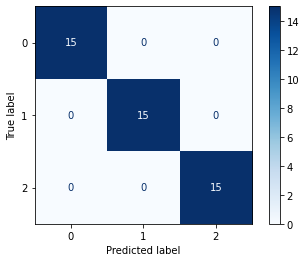

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')

In [ ]:
mnist=tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test)=mnist.load_data()
x_train=x_train/255.
x_test=x_test/255.
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


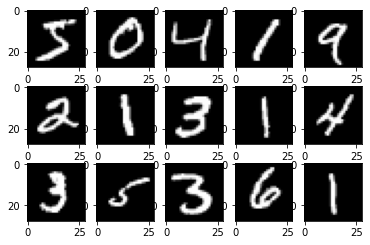

In [ ]:
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(x_train[i], cmap='gray')

In [ ]:
from tensorflow.keras import models, layers, utils

def build_mnistmodel():
  x=layers.Input(shape=(28,28))
  y=layers.Flatten()(x)
  y=layers.Dense(784, activation='relu')(y)
  y=layers.Dense(1000, activation='relu')(y)
  y=layers.Dense(500, activation='relu')(y)
  y=layers.Dense(10, activation='softmax', name='OutputLayer')(y)
  model=models.Model(x, y)
  return model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 1000)              785000    
                                                                 
 dense_2 (Dense)             (None, 500)               500500    
                                                                 
 OutputLayer (Dense)         (None, 10)                5010      
                                                                 
Total params: 1,905,950
Trainable params: 1,905,950
Non-train

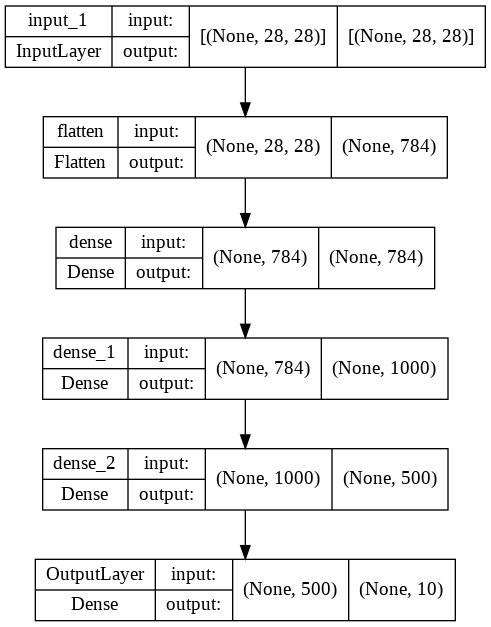

In [ ]:
model=build_mnistmodel()
model.summary()
utils.plot_model(model, show_shapes=True)

In [ ]:
from sklearn import metrics
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 119s 20ms/step - loss: 0.1164 - accuracy: 0.9670
Epoch 2/10
6000/6000 [==============================] - 115s 19ms/step - loss: 0.0918 - accuracy: 0.9750
Epoch 3/10
6000/6000 [==============================] - 115s 19ms/step - loss: 0.0778 - accuracy: 0.9790
Epoch 4/10
6000/6000 [==============================] - 112s 19ms/step - loss: 0.0637 - accuracy: 0.9827
Epoch 5/10
6000/6000 [==============================] - 111s 18ms/step - loss: 0.0607 - accuracy: 0.9843
Epoch 6/10
6000/6000 [==============================] - 110s 18ms/step - loss: 0.0521 - accuracy: 0.9863
Epoch 7/10
6000/6000 [==============================] - 113s 19ms/step - loss: 0.0475 - accuracy: 0.9876
Epoch 8/10
6000/6000 [==============================] - 112s 19ms/step - loss: 0.0448 - accuracy: 0.9893
Epoch 9/10
6000/6000 [==============================] - 112s 19ms/step - loss: 0.0423 - accuracy: 0.9893
Epoch 10/10
6000/6000 [==============================] 

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1232 - accuracy: 0.9705


[0.12315034121274948, 0.9704999923706055]

In [ ]:
y_pred=model.predict(x_test)
print(y_pred[0], y_pred.shape)
y_pred=np.argmax(y_pred, axis=1)
print(y_pred[0], y_pred.shape)
print(y_test[0], y_test.shape)

[0.0000000e+00 2.0863268e-30 6.6229649e-26 5.6538570e-30 4.6568108e-21
 0.0000000e+00 0.0000000e+00 1.0000000e+00 2.8411691e-31 1.4730441e-26] (10000, 10)
7 (10000,)
7 (10000,)


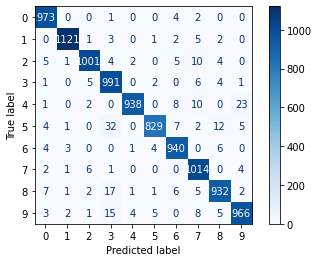

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')